In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import operator
import difflib


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

from collections import Counter


In [88]:
data = pd.read_csv('C:\\Users\\User\\Downloads\\wfp_food_prices_kaz.csv')
print(len(data))
print( data.head() )

3365
         date        admin1       admin2      market  latitude  longitude  \
0  11/15/2005  Akmolinskaya  Tselinograd  Nur-Sultan     51.17      71.43   
1  11/15/2005  Akmolinskaya  Tselinograd  Nur-Sultan     51.17      71.43   
2  11/15/2005  Akmolinskaya  Tselinograd  Nur-Sultan     51.17      71.43   
3  11/15/2005  Akmolinskaya  Tselinograd  Nur-Sultan     51.17      71.43   
4  11/15/2005  Akmolinskaya  Tselinograd  Nur-Sultan     51.17      71.43   

              category                  commodity unit priceflag pricetype  \
0   cereals and tubers                   Potatoes   KG    actual    Retail   
1   cereals and tubers  Wheat flour (first grade)   KG    actual    Retail   
2  meat, fish and eggs                Meat (beef)   KG    actual    Retail   
3       milk and dairy                       Milk    L    actual    Retail   
4         oil and fats            Oil (sunflower)    L    actual    Retail   

  currency  price  usdprice  
0      KZT     40    0.2436  
1  

Text(0.5, 1.08, 'Combination of cloumns')

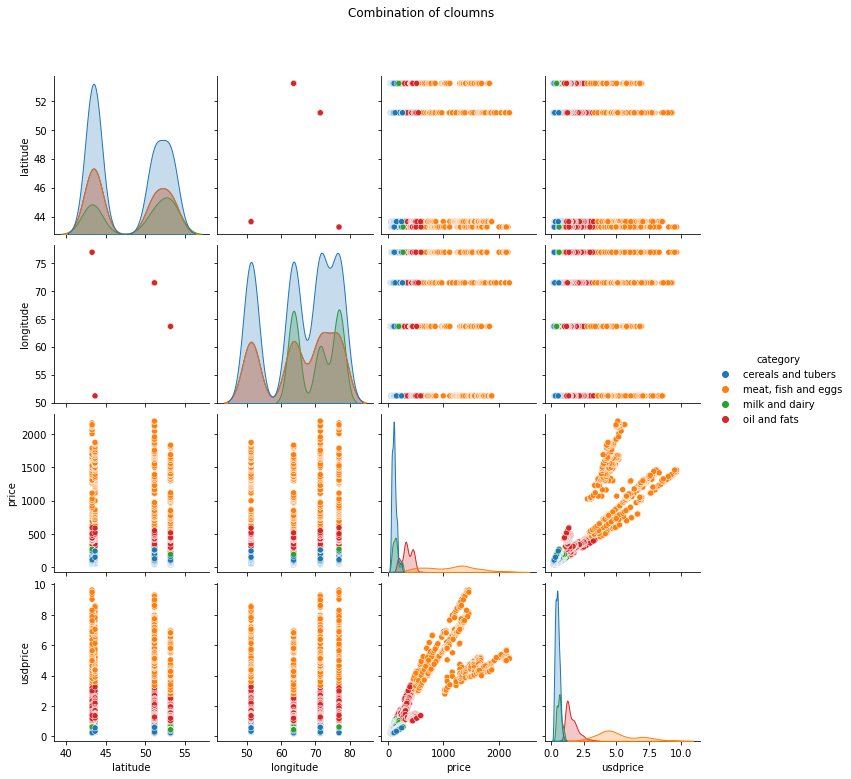

In [89]:
# di= {0.0: ' large_airport', 1.0: 'medium_airport', 2.0 : 'small_airport'}

draw = sns.pairplot(data.replace({'category'}), hue= 'category')
draw.fig.suptitle('Combination of cloumns', y=1.08)

In [90]:
category = data.groupby(['category'])
meat = category.get_group('meat, fish and eggs')
cereals_tubers = category.get_group('cereals and tubers')
milk_dairy = category.get_group('milk and dairy')
oil_fats = category.get_group('oil and fats')

In [91]:
ftpt = []
ftpt = ftpt.append([oil_fats, milk_dairy, cereals_tubers, meat])


In [92]:
print(ftpt)

None


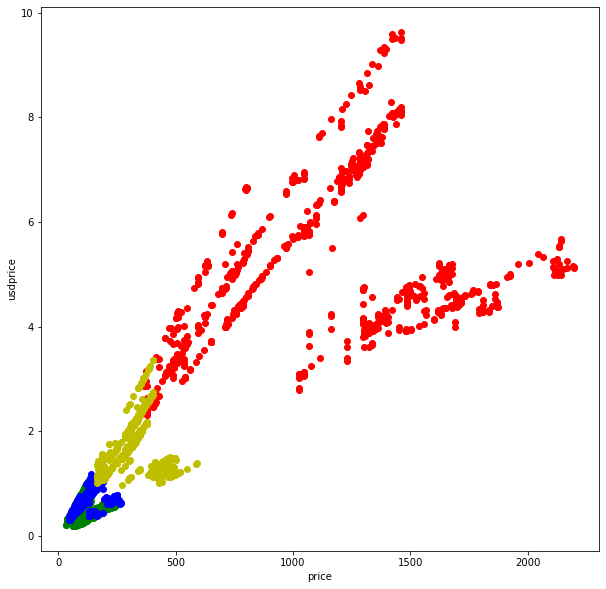

In [93]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(meat['price'], meat['usdprice'], color='r')
ax.scatter(cereals_tubers['price'], cereals_tubers['usdprice'], color='g')
ax.scatter(milk_dairy['price'], milk_dairy['usdprice'], color='b')
ax.scatter(oil_fats['price'], oil_fats['usdprice'], color='y')

ax.set_xlabel('price')
ax.set_ylabel('usdprice')
plt.show()

In [94]:
print(meat['commodity'].unique())
print(cereals_tubers['commodity'].unique())
print(milk_dairy['commodity'].unique())
print(oil_fats['commodity'].unique())

['Meat (beef)']
['Potatoes' 'Wheat flour (first grade)']
['Milk']
['Oil (sunflower)']


In [95]:
cereals_tubers_commodity = cereals_tubers.groupby(['commodity'])
potatoes = cereals_tubers_commodity.get_group('Potatoes')
wheat_flour = cereals_tubers_commodity.get_group('Wheat flour (first grade)')

So Based on this we conducted to take cerials tubers and oil fats

In [96]:
combo = cereals_tubers.append(oil_fats)
print(type(cereals_tubers))

<class 'pandas.core.frame.DataFrame'>


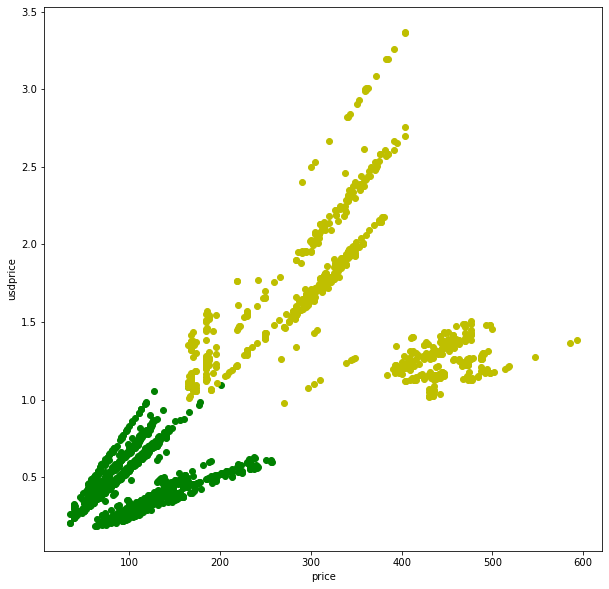

In [97]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(cereals_tubers['price'], cereals_tubers['usdprice'], color='g')
ax.scatter(oil_fats['price'], oil_fats['usdprice'], color='y')

ax.set_xlabel('price')
ax.set_ylabel('usdprice')
plt.show()

In [98]:
x = combo.iloc[:, 12:14]
y = combo.iloc[:, 6]

X_train, X_test, y_train, y_test= train_test_split(x, y,test_size= 0.2,shuffle= True,random_state= 0)

In [99]:
#Here I normalize data 
scaler= Normalizer().fit(X_train)
normalized_x_train= scaler.transform(X_train) 
normalized_x_test= scaler.transform(X_test)

In [100]:
def EuclideanDis(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


In [101]:
def kNn(xTrain, yTrain, xTest, k):
    ans_pred = []
    i = 0
    for x_test_point in xTest:
        p = knn(xTrain, yTrain, x_test_point, k)
        print(i, ': ', p)
        i += 1
        ans_pred.append(p)
    return ans_pred     

In [102]:
def knn(xTrain, yTrain, xTest, k):
    distances = []
    groundTruthLabels = []
    for i in range(xTrain.shape[0]):
        dis = EuclideanDis(xTrain[i][0], xTrain[i][1], xTest[0], xTest[1])
        distances.append(dis)
    
    for tr in yTrain:
        groundTruthLabels.append(tr)
        
    #Simple Buble sort
    for i in range(xTrain.shape[0]):
        for j in range(i, xTrain.shape[0]):
            if distances[i] > distances[j]:
                distances[i], distances[j] = distances[j], distances[i]
                groundTruthLabels[i], groundTruthLabels[j] = groundTruthLabels[j], groundTruthLabels[i]
                
    counts = {"cereals and tubers":0,"meat, fish and eggs":0,"oil and fats":0, "milk and dairy":0}
    for i in range(k):
        counts[groundTruthLabels[i]] += 1
        
    sortedVotes = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [16]:
K = 7
y_pred = kNn(normalized_x_train,y_train, normalized_x_test, K)
print(y_pred)

0 :  cereals and tubers
1 :  oil and fats
2 :  cereals and tubers
3 :  cereals and tubers
4 :  cereals and tubers
5 :  cereals and tubers
6 :  cereals and tubers
7 :  cereals and tubers
8 :  cereals and tubers
9 :  cereals and tubers
10 :  cereals and tubers
11 :  cereals and tubers
12 :  cereals and tubers
13 :  cereals and tubers
14 :  oil and fats
15 :  cereals and tubers
16 :  oil and fats
17 :  cereals and tubers
18 :  cereals and tubers
19 :  cereals and tubers
20 :  oil and fats
21 :  cereals and tubers
22 :  cereals and tubers
23 :  oil and fats
24 :  cereals and tubers
25 :  cereals and tubers
26 :  oil and fats
27 :  cereals and tubers
28 :  cereals and tubers
29 :  cereals and tubers
30 :  cereals and tubers
31 :  cereals and tubers
32 :  cereals and tubers
33 :  cereals and tubers
34 :  cereals and tubers
35 :  cereals and tubers
36 :  cereals and tubers
37 :  cereals and tubers
38 :  cereals and tubers
39 :  cereals and tubers
40 :  oil and fats
41 :  oil and fats
42 :  ce

332 :  cereals and tubers
333 :  cereals and tubers
334 :  cereals and tubers
335 :  oil and fats
336 :  cereals and tubers
337 :  cereals and tubers
338 :  cereals and tubers
339 :  oil and fats
340 :  cereals and tubers
341 :  cereals and tubers
342 :  oil and fats
343 :  oil and fats
344 :  cereals and tubers
345 :  cereals and tubers
346 :  cereals and tubers
347 :  cereals and tubers
348 :  cereals and tubers
349 :  oil and fats
350 :  cereals and tubers
351 :  oil and fats
352 :  cereals and tubers
353 :  cereals and tubers
354 :  cereals and tubers
355 :  cereals and tubers
356 :  cereals and tubers
357 :  cereals and tubers
358 :  cereals and tubers
359 :  cereals and tubers
360 :  oil and fats
361 :  cereals and tubers
362 :  cereals and tubers
363 :  cereals and tubers
364 :  cereals and tubers
365 :  cereals and tubers
366 :  cereals and tubers
367 :  oil and fats
368 :  oil and fats
369 :  cereals and tubers
370 :  cereals and tubers
371 :  oil and fats
372 :  cereals and t

In [103]:
#Inbulid database for cheking
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn= knn.predict(normalized_x_test)
print(y_pred_sklearn)

['cereals and tubers' 'oil and fats' 'cereals and tubers'
 'cereals and tubers' 'cereals and tubers' 'cereals and tubers'
 'cereals and tubers' 'cereals and tubers' 'cereals and tubers'
 'cereals and tubers' 'cereals and tubers' 'cereals and tubers'
 'cereals and tubers' 'cereals and tubers' 'oil and fats'
 'cereals and tubers' 'oil and fats' 'cereals and tubers'
 'cereals and tubers' 'cereals and tubers' 'oil and fats'
 'cereals and tubers' 'cereals and tubers' 'oil and fats'
 'cereals and tubers' 'cereals and tubers' 'oil and fats'
 'cereals and tubers' 'cereals and tubers' 'cereals and tubers'
 'cereals and tubers' 'cereals and tubers' 'cereals and tubers'
 'cereals and tubers' 'cereals and tubers' 'cereals and tubers'
 'cereals and tubers' 'cereals and tubers' 'cereals and tubers'
 'cereals and tubers' 'oil and fats' 'oil and fats' 'cereals and tubers'
 'cereals and tubers' 'cereals and tubers' 'cereals and tubers'
 'cereals and tubers' 'cereals and tubers' 'cereals and tubers'
 'c

In [104]:
#Here I check does my realization of KNN same as inbuld library 
# print(np.array_equal(y_pred_sklearn, y_pred))
res = len(set(y_pred_sklearn) & set(y_pred)) / float(len(set(y_pred_sklearn) | set(y_pred))) * 100
print(res)

100.0


In [105]:
ans = {}
k = 3
while k < 20:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    ans[k] = "Result : {:.2f}".format(knn.score(X_test, y_test))
    k+= 2

In [106]:
print(ans)

{3: 'Result : 0.97', 5: 'Result : 0.96', 7: 'Result : 0.96', 9: 'Result : 0.96', 11: 'Result : 0.95', 13: 'Result : 0.95', 15: 'Result : 0.96', 17: 'Result : 0.95', 19: 'Result : 0.96'}


SVM classification

In [107]:
from sklearn.svm import SVC

svc_model = SVC(kernel='linear', random_state=32)
svc_model.fit(X_train, y_train)
# normalized_y_train = scaler.transform(y_train) 

SVC(kernel='linear', random_state=32)

In [108]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn import svm

MODEL_01 = svm.SVC(kernel = 'linear')
MODEL_01.fit(normalized_x_train, y_train)

PREDICTIONS_01 = MODEL_01.predict(normalized_x_test)

print(accuracy_score(PREDICTIONS_01, y_test))

0.671264367816092


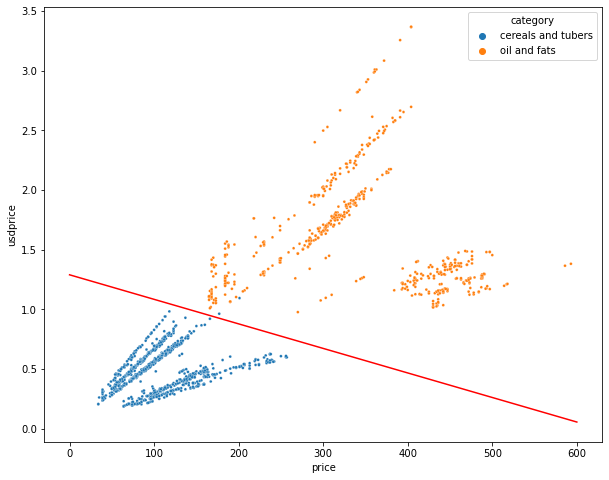

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


sns.scatterplot(x=X_train['price'], 
                y=X_train["usdprice"], 
                hue=y_train, 
                s=8)

w = svc_model.coef_[0]          
b = svc_model.intercept_[0]     
x_points = np.linspace(0, 600)    
y_points = -(w[0] / w[1]) * x_points - b / w[1] 

plt.plot(x_points, y_points, c='r')

In [110]:
print(w,b)

[0.01155634 5.62258649] -7.255937531868867
